In [0]:
import pandas as pd
import numpy as np
import math

In [2]:
trainData = pd.read_csv('leu_data.csv')
#testData = pd.read_csv('test.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
trainData.shape
x = trainData.T
x = x.reset_index(drop=True)
Y = x.iloc[:,-1]
X = x.iloc[:,:-1]
print('Shape of input data:', X.shape)
print('Shape of label data:', Y.shape)

Shape of input data: (33, 45032)
Shape of label data: (33,)


In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)


In [5]:
X.columns=X.columns.astype(str)
X.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '45022', '45023', '45024', '45025', '45026', '45027', '45028', '45029',
       '45030', '45031'],
      dtype='object', length=45032)

In [6]:
X.loc[:,'0'].astype('int64')
print(X['0'].dtype)

object


In [0]:
X_d = pd.DataFrame()
for cols in X.columns:
    if X[cols].dtype == 'object':
        X_d[cols]=X.loc[:,cols].astype('int64')

In [9]:
X_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Columns: 45032 entries, 0 to 45031
dtypes: int64(45032)
memory usage: 11.3 MB


In [0]:
# useless=[]
# for col in X.columns:

#      print(type(X[col][0]))    
# #     if sum(list(X[col]))==0:
# #         useless.append(col)
# # print(useless)


In [11]:
useless=[]
for col in X_d.columns:
    if len(list(X_d[col].unique())) == 1:
        useless.append(col)
print(useless)


['1', '2', '7', '11', '14', '15', '16', '17', '20', '22', '23', '26', '28', '30', '32', '33', '40', '43', '47', '49', '52', '53', '54', '55', '56', '57', '58', '59', '60', '62', '69', '71', '78', '80', '84', '88', '89', '93', '95', '96', '97', '99', '100', '101', '102', '104', '108', '113', '117', '119', '122', '124', '125', '126', '127', '129', '130', '133', '136', '137', '138', '142', '143', '148', '151', '154', '155', '156', '159', '160', '163', '171', '175', '177', '179', '184', '185', '191', '192', '198', '200', '201', '203', '205', '206', '207', '208', '211', '216', '217', '224', '226', '227', '229', '230', '231', '232', '233', '238', '240', '242', '246', '247', '249', '250', '254', '255', '258', '259', '260', '261', '262', '263', '265', '268', '270', '272', '274', '277', '279', '286', '289', '291', '292', '296', '298', '302', '304', '309', '311', '314', '318', '319', '323', '325', '328', '329', '330', '331', '333', '335', '336', '337', '339', '341', '342', '343', '344', '345', '

In [0]:
X_d=X_d.drop(useless,axis=1)

In [19]:
X_d.shape

(33, 25820)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scl=scaler.fit_transform(X_d)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X_scl,Y,test_size=0.33,random_state=42)


In [0]:
class Neuron:
    
    def __init__(self, weights=[], bias=1, dim=0, activation_fn = 'sig'):
        self.weights = weights
        self.bias = 1
        #self.wieghts = np.insert(np.array(self.weights),len(self.weights), bias)
        self.input_dim = dim
        self.act_fn = activation_fn
    def relu(self,x):
        if x>0:
            return float(x)
        else:
            return float(0)
        
    def sigmoid(self,x):
        return 1.0 / (1.0 + np.exp(-1.0 *x))
    def _act_function(self, ws):
        if self.act_fn == 'sig':
            return self.sigmoid(ws)
        elif self.act_fn == 'relu':
            return self.relu(ws)
    def assign_bias(self,b):
        self.bias = b
    def wt_sum(self, x):
        w = np.multiply(np.array(self.weights, dtype = 'float64') , np.array(x, dtype = 'float64'))
        return np.sum(w)
    def assign_w(self, weights):
        self.weights = weights
    def propagate(self, x):
        p = self.wt_sum(x) + self.bias
        return self._act_function(p) , p

In [0]:
class Layer:
    
    def __init__(self, n=1, prev = 0, activation_fn = 'sig'):
        self.no_neuron = n
        self.prev_layer = prev
        self.neurons = []
        self.activation_fn = activation_fn
        for i in range(n):
            neu = Neuron(dim = prev,bias = 1,activation_fn = activation_fn)
            self.neurons.append(neu)
    def weights(self):
        we = []
        for neu in self.neurons:
            we.append(neu.weights)
        return np.array(we)
    def weight_mat(self, w):
        for i in range(self.no_neuron):
            self.neurons[i].assign_w(w[i])
    def assign_b(self,b):
        for i in range(self.no_neuron):
            self.neurons[i].assign_bias(b[i])
    def biases(self):
        we = []
        for neu in self.neurons:
            we.append(neu.bias)
        return np.array(we)
    #Generate output for the layer
    def generate(self, inputs):
        output = []
        z = []
        for i in range(self.no_neuron):
            o,zz = self.neurons[i].propagate(inputs)
            output.append(o)
            z.append(zz)
        self.output = np.array(output)
        return self.output , np.array(z)

In [0]:
class NeuralNetwork:
    
    def __init__ (self, learning_rate = 0.01, no_input=1, no_output=1, no_hidden_layers=1, hidden_dim=[40], batch_siz = 1, h_act = ['relu'], o_act = 'sig', random_state = 42):
        self.learning_rate = learning_rate
        self.no_input = no_input
        self.no_output = no_output
        self.no_hidden_layers = no_hidden_layers
        self.hidden_dim = hidden_dim
        self.batch_siz = batch_siz
        np.random.seed(random_state)
        # Initialize Hidden layer
        self.hidden_layer = list()
        self.hidden_layer.append(Layer(n = self.hidden_dim[0],prev = self.no_input, activation_fn = h_act[0]))
        
        # Initialize weights and bias for hidden and outplut layers
        
        self.hidden_layer[0].weight_mat(w=np.random.randn(self.hidden_dim[0],self.no_input)*0.01)
        self.hidden_layer[0].assign_b(b=np.zeros(self.hidden_dim[0]))
        for i in range(1,self.no_hidden_layers):
            self.hidden_layer.append(Layer(n = self.hidden_dim[i],prev = self.hidden_dim[i-1], activation_fn = h_act[i]))
            self.hidden_layer[i].weight_mat(w=np.random.randn(self.hidden_dim[i],self.hidden_dim[i-1])*0.01)
            self.hidden_layer[i].assign_b(b=np.zeros(self.hidden_dim[i]))
        
        self.output_layer = Layer(n = self.no_output, prev = self.hidden_dim[-1], activation_fn = o_act)
        self.output_layer.weight_mat(w=np.random.randn(self.no_output,self.hidden_dim[-1])*0.01)
        self.output_layer.assign_b(b=np.zeros(self.no_output))
    
    def sigmoid(self,x):
        return 1.0 / (1.0 + np.exp(-1.0 * np.array(x)))
        
    def feedForward(self, inputs):
        # Feed forward the input row to the first hidden layer and the subsequent network
        # Return the output of each layer and Weighted sum for each layer
        ai = list()
        zi = list()
        hiddenl_i = inputs
        hiddenl_o = None
        for lay in self.hidden_layer:
            hiddenl_o, z = lay.generate(hiddenl_i)
            ai.append(hiddenl_o)
            zi.append(z)
            hiddenl_i = hiddenl_o
        outputl_o, z = self.output_layer.generate(hiddenl_o)
        ai.append(outputl_o)
        zi.append(z)
        return ai,zi
    
    def der_of_act(self,layer,a):
        
        #Calculates the output according to the derivative of the activation function
        
        if layer.activation_fn == 'sig':
            return np.array(self.sigmoid(a))*(1.0 - np.array(self.sigmoid(a)))
        elif layer.activation_fn == 'relu':
            d = []
            for x in a:
                if x>0:
                    d.append(1.0)
                else:
                    d.append(0.0)
            return np.array(d)
    def der_of_cost(self,layer,a, y):
        
        #Calculates the output according to the derivative of the cost function
        
        if layer.activation_fn == 'relu':
            return np.subtract(np.array(a), np.array(y))
        elif layer.activation_fn == 'sig':
            return (np.subtract(np.array(a), np.array(y))) / (np.array(a)*(1.0 - np.array(a)))
        
    def delt(self, x_train, y_train,lamda):
        ai,zi = self.feedForward(x_train)
        err = list()
        
        # Calculate the Error term for output layer
        err.append(np.subtract(ai[-1],y_train))
        
        # Propagate the error backwards into the hidden layers
       
        w_o = self.output_layer.weights()
        e = np.multiply(np.dot(err[0].reshape(1,self.no_output),w_o), self.der_of_act(self.hidden_layer[-1],zi[-2]))
        err.insert(0,e.reshape(1,self.hidden_dim[-1]))
        for i in range(2, self.no_hidden_layers+1):
            w_h = self.hidden_layer[-i+1].weights()
            e = np.multiply(np.dot(err[0].reshape(1,self.hidden_dim[-i+1]),w_h), self.der_of_act(self.hidden_layer[-i],zi[-i-1]) )
            err.insert(0,e.reshape(1,self.hidden_dim[-i]))
            
        # Calculate delta J/ del Weights
        delta = []
        newl = list()
        newl.extend(self.hidden_layer)
        newl.append(self.output_layer)
        delta.append(self.learning_rate * np.add(np.dot(err[0].T, x_train[np.newaxis]),(lamda*self.hidden_layer[0].weights())))
        for i in range(1,len(err)):
            delta.append(self.learning_rate * np.add(np.dot(err[i].T, ai[i-1][np.newaxis]) , (lamda*newl[i].weights())) )
        
        # Return deltas and errors for each layer
        return delta, err
    
    def fit(self, X , y, no_epochs,lamda):
        epoch = 1
        eper = {}
        er = {}
        if no_epochs is None:
            epoch = 1
        else:
            epoch = no_epochs
            
        # Train for each epoch
        for ep in range(epoch):
            q = 0
            
            # Calculate Delta and erors in batches of the batch_siz
            
            for i in range(int(len(X)/self.batch_siz)):
                d = None
                e = None
                rmse = 0
                for j in range(self.batch_siz):
                    delta, err = self.delt(X[q],y[q], lamda)
                    if d == None:
                        d = delta
                        e = err
                    else:
                        for k in range(len(d)):
                            d[k] = np.add(d[k] , delta[k])
                        for k in range(len(e)):
                            e[k] = np.add(e[k] , err[k])
                    err[-1] = np.array(err[-1]) ** 2
                    rmse = rmse +  np.sum(err[-1])
                    q = q+1

                for l in range(len(d)):
                    d[l] = d[l] / self.batch_siz
                for l in range(len(e)):
                    e[l] = (np.divide(e[l], self.batch_siz) * self.learning_rate)
                rmse = rmse / self.batch_siz
                er.update({(ep*len(X))+q:rmse})
                
                eper.update({(ep*len(X))+q:np.mean(list(er.values()))})
                
                ##Weight and bias update for hidden and output layer
                
                for m in range(self.no_hidden_layers):
                    self.hidden_layer[m].weight_mat(np.subtract(self.hidden_layer[m].weights(),d[m]))
                    
                    bi = np.subtract(self.hidden_layer[m].biases()[np.newaxis],e[m]).reshape(self.hidden_dim[m],)

                    self.hidden_layer[m].assign_b(bi)
                self.output_layer.weight_mat(np.subtract(self.output_layer.weights(),d[-1]))
                self.output_layer.assign_b(np.subtract(self.output_layer.biases(),e[-1]))
        
        # Return mean RMSE for each training example for each epoch
        return eper
    
    def predict(self, X):
        y = []
        for x in X:
            ai,xi = self.feedForward(x)
            y.append(ai[-1])
        y = np.array(y)
        return y  
    def predict_class(self, X):
        
        #Predict class in case of Sigmoid output layer with threshold set to 0.5
        
        y = self.predict(X)
        for i in range(len(y)):
            if y[i]>0.5:
                y[i] = 1
            else:
                y[i] = 0
        return y

In [28]:
X_train.shape

(22, 25820)

In [0]:
nn = NeuralNetwork(no_input=25820, no_hidden_layers= 2, hidden_dim=[50,50], h_act = ['relu','relu'], o_act = 'sig', batch_siz = 1)
er = nn.fit(X_train, y_train, no_epochs = 500,lamda = 0.01)

In [0]:
from sklearn.metrics import accuracy_score
pred = nn.predict_class(X_val)

acc = accuracy_score(y_true = y_val, y_pred = pred)

In [33]:
print(acc)

0.9090909090909091


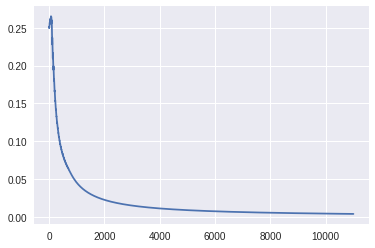

In [34]:
import matplotlib.pylab as plt
%matplotlib inline

plt.plot(list(er.keys()), list(er.values()))
plt.show()